# Notebook_15 - Final project

This notebook is the final in the series. It is just a showcase of pandas + matplotlib capabilities. Feel free to use information from this project in your learning proccess!

This project is aimed to show distribution of suicide cases in different countries and time, between people of different sex and age

The core idea is to see the trend and predict future cases change. In order to do this, we need to compare some categories: suicide cases for the whole time period, suicides per capita and distribution between countries and sexes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('who_suicide_statistics.csv')


### First, we can see the amount of missing data in the set, these data should be deleted entirely in order to have only valid data

* Years 2015, 2016 are deleted due to having mainly zeroes as values

In [2]:
raw_data = data.shape[0]
data.drop(index=data[data['year'].isin((2015, 2016))].index, inplace=True)
data = data.dropna()
cleaned_data = data.shape[0]

print(f'{raw_data-cleaned_data} data rows were deleted due to missing or incorrect values')

8772 data rows were deleted due to missing or incorrect values


### For convenience country means the territory of country, rather than the actual country, because some countries had their borders and names changed 

In [3]:
print(f'{len(data.country.unique())} countries will be inspected')

117 countries will be inspected


In [4]:
categories = 'year', 'suicides_no', 'population'
for i in categories:
    print(f'Mean for {i} is {data[i].mean(): .2f}')
    print(f'Standart deviation for {i} is {data[i].std(): .2f}')
    print(f'Median for {i} is {data[i].median(): .0f}')
    print()

Mean for year is  1998.44
Standart deviation for year is  9.91
Median for year is  1999

Mean for suicides_no is  222.11
Standart deviation for suicides_no is  858.71
Median for suicides_no is  21

Mean for population is  1691557.69
Standart deviation for population is  3681003.90
Median for population is  373359



### Drop in 1983 is probably not connected with any serious events, it is rather just some broken data inside

* It is obvious that on average there are approximately 3 times more cases among men than among women

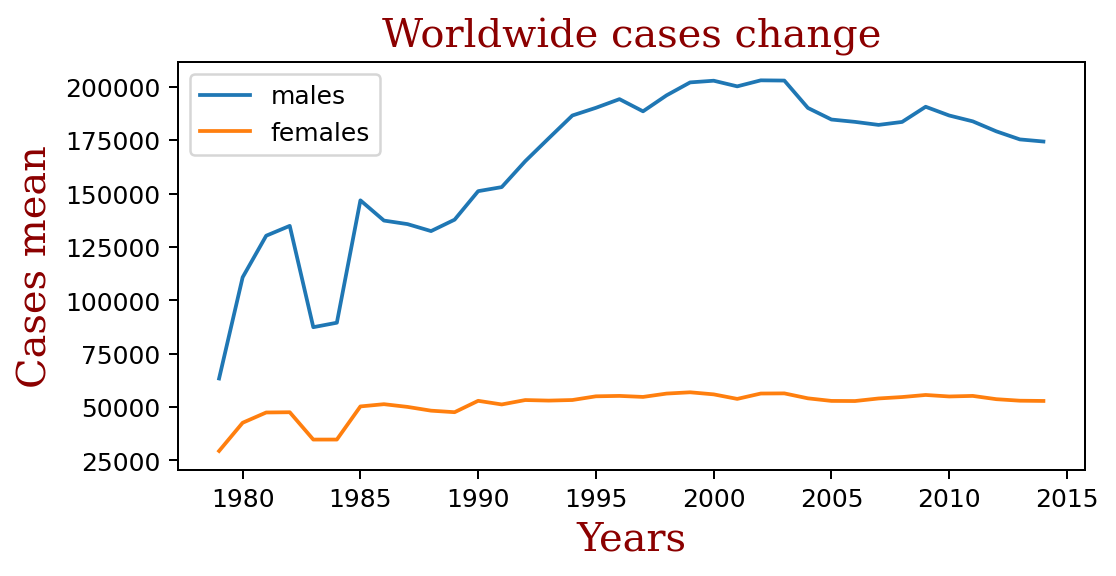

In [5]:
years = sorted(data.year.unique())
def transfer_for_plot(data, category, uniq):
    years = sorted(data[uniq].unique())
    world_mean = {}
    for i in years:
        world_mean[i] = data[data[uniq] == i][category].sum()
    lists = sorted(world_mean.items()) 
    x, y = zip(*lists) 
    return x, y

# Adjust dpi if something showing incorrectly!
dpi = 72*2.5
font = {
    'family': 'serif',
    'color': 'darkred',
    'size': 16
}
plt.figure(figsize = [6.5, 3], dpi=dpi)

males = transfer_for_plot(data[data.sex == 'male'], 'suicides_no', 'year')
females = transfer_for_plot(data[data.sex == 'female'], 'suicides_no', 'year')

plt.plot(males[0], males[1], label='males')
plt.plot(females[0], females[1], label='females')

plt.title('Worldwide cases change', fontdict=font)
plt.xlabel('Years', fontdict=font)
plt.ylabel('Cases mean', fontdict=font)
plt.legend()



## As some rows are dropped, and some countries are not listed, 'worldwide' means including all listed countries for all correct values (this applies to all data inspected!)

* Population have been rising normally except for 1983, 1988, 2005, these drops are probably connected with some disastrous events

Text(0, 0.5, 'Population')

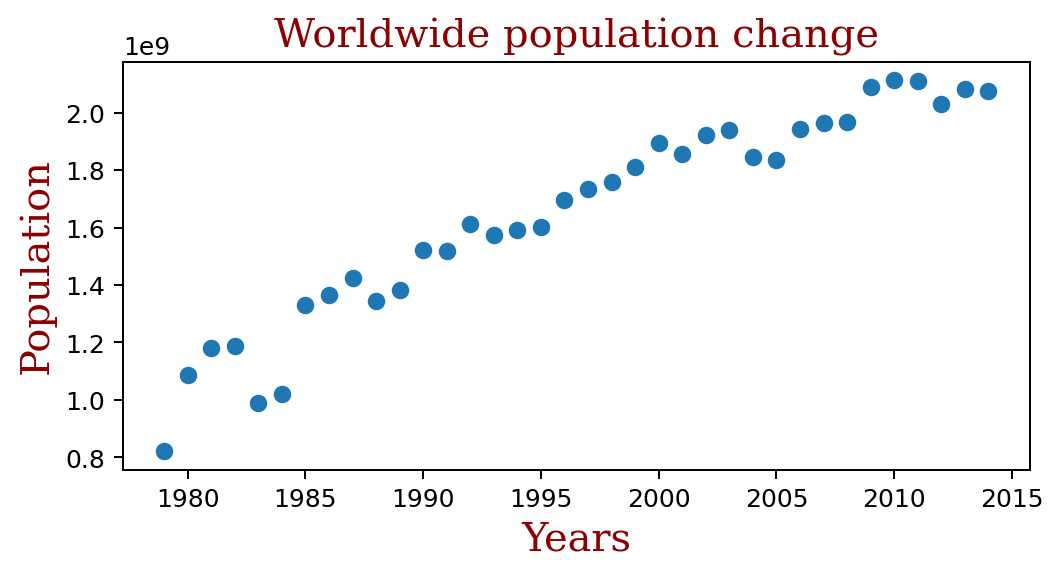

In [6]:
dpi = 72*2.5
font = {
    'family': 'serif',
    'color': 'darkred',
    'size': 16
}
plt.figure(figsize = [6.5, 3], dpi=dpi)

year_distribution = transfer_for_plot(data, 'population', 'year')
plt.scatter(year_distribution[0], year_distribution[1])

plt.title('Worldwide population change', fontdict=font)
plt.xlabel('Years', fontdict=font)
plt.ylabel('Population', fontdict=font)

### Drop in 1983 is connected with broken data, while spikes in 1986 and 1995 are probably connected to some dark events

* Fourtunately, worldwide amount per capita have been decreasing since 1995, having some spikes before

Text(0, 0.5, 'Suicides per capita')

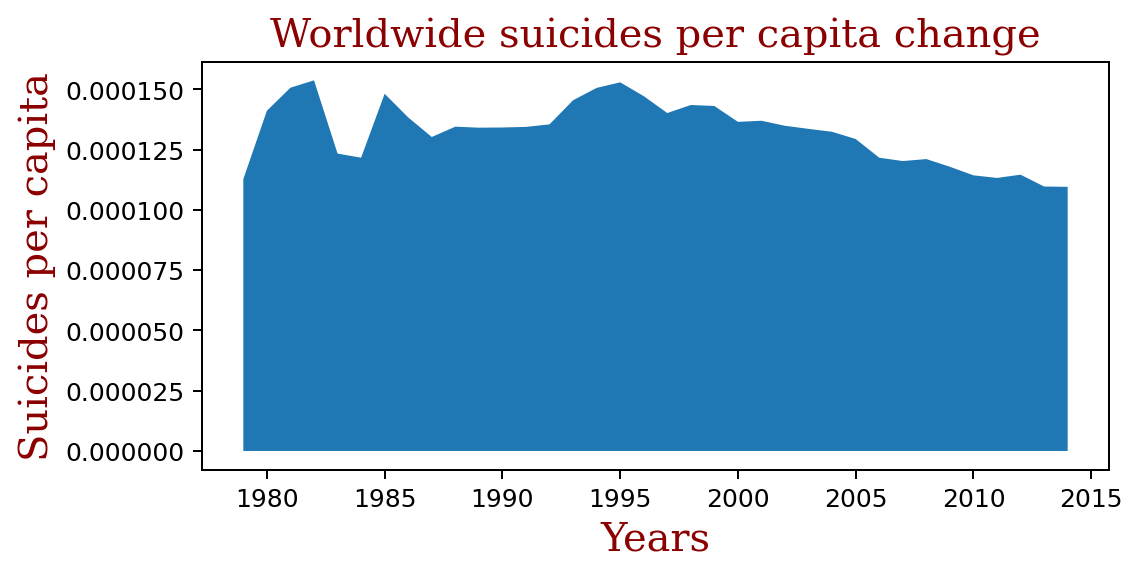

In [7]:
years = sorted(data.year.unique())
a = []
for i in years:
    a.append(data[data['year'] == i]['suicides_no'].sum()/data[data['year'] == i]['population'].sum())

dpi = 72*2.5
font = {
    'family': 'serif',
    'color': 'darkred',
    'size': 16
}
plt.figure(figsize = [6.5, 3], dpi=dpi)

plt.fill_between(years, a)
plt.title('Worldwide suicides per capita change', fontdict=font)
plt.xlabel('Years', fontdict=font)
plt.ylabel('Suicides per capita', fontdict=font)


### It is obviuos that most suicides were commited in Japan, Russian Federation, United States of America

* Listed countries are countries with > 1% of worldwide amount

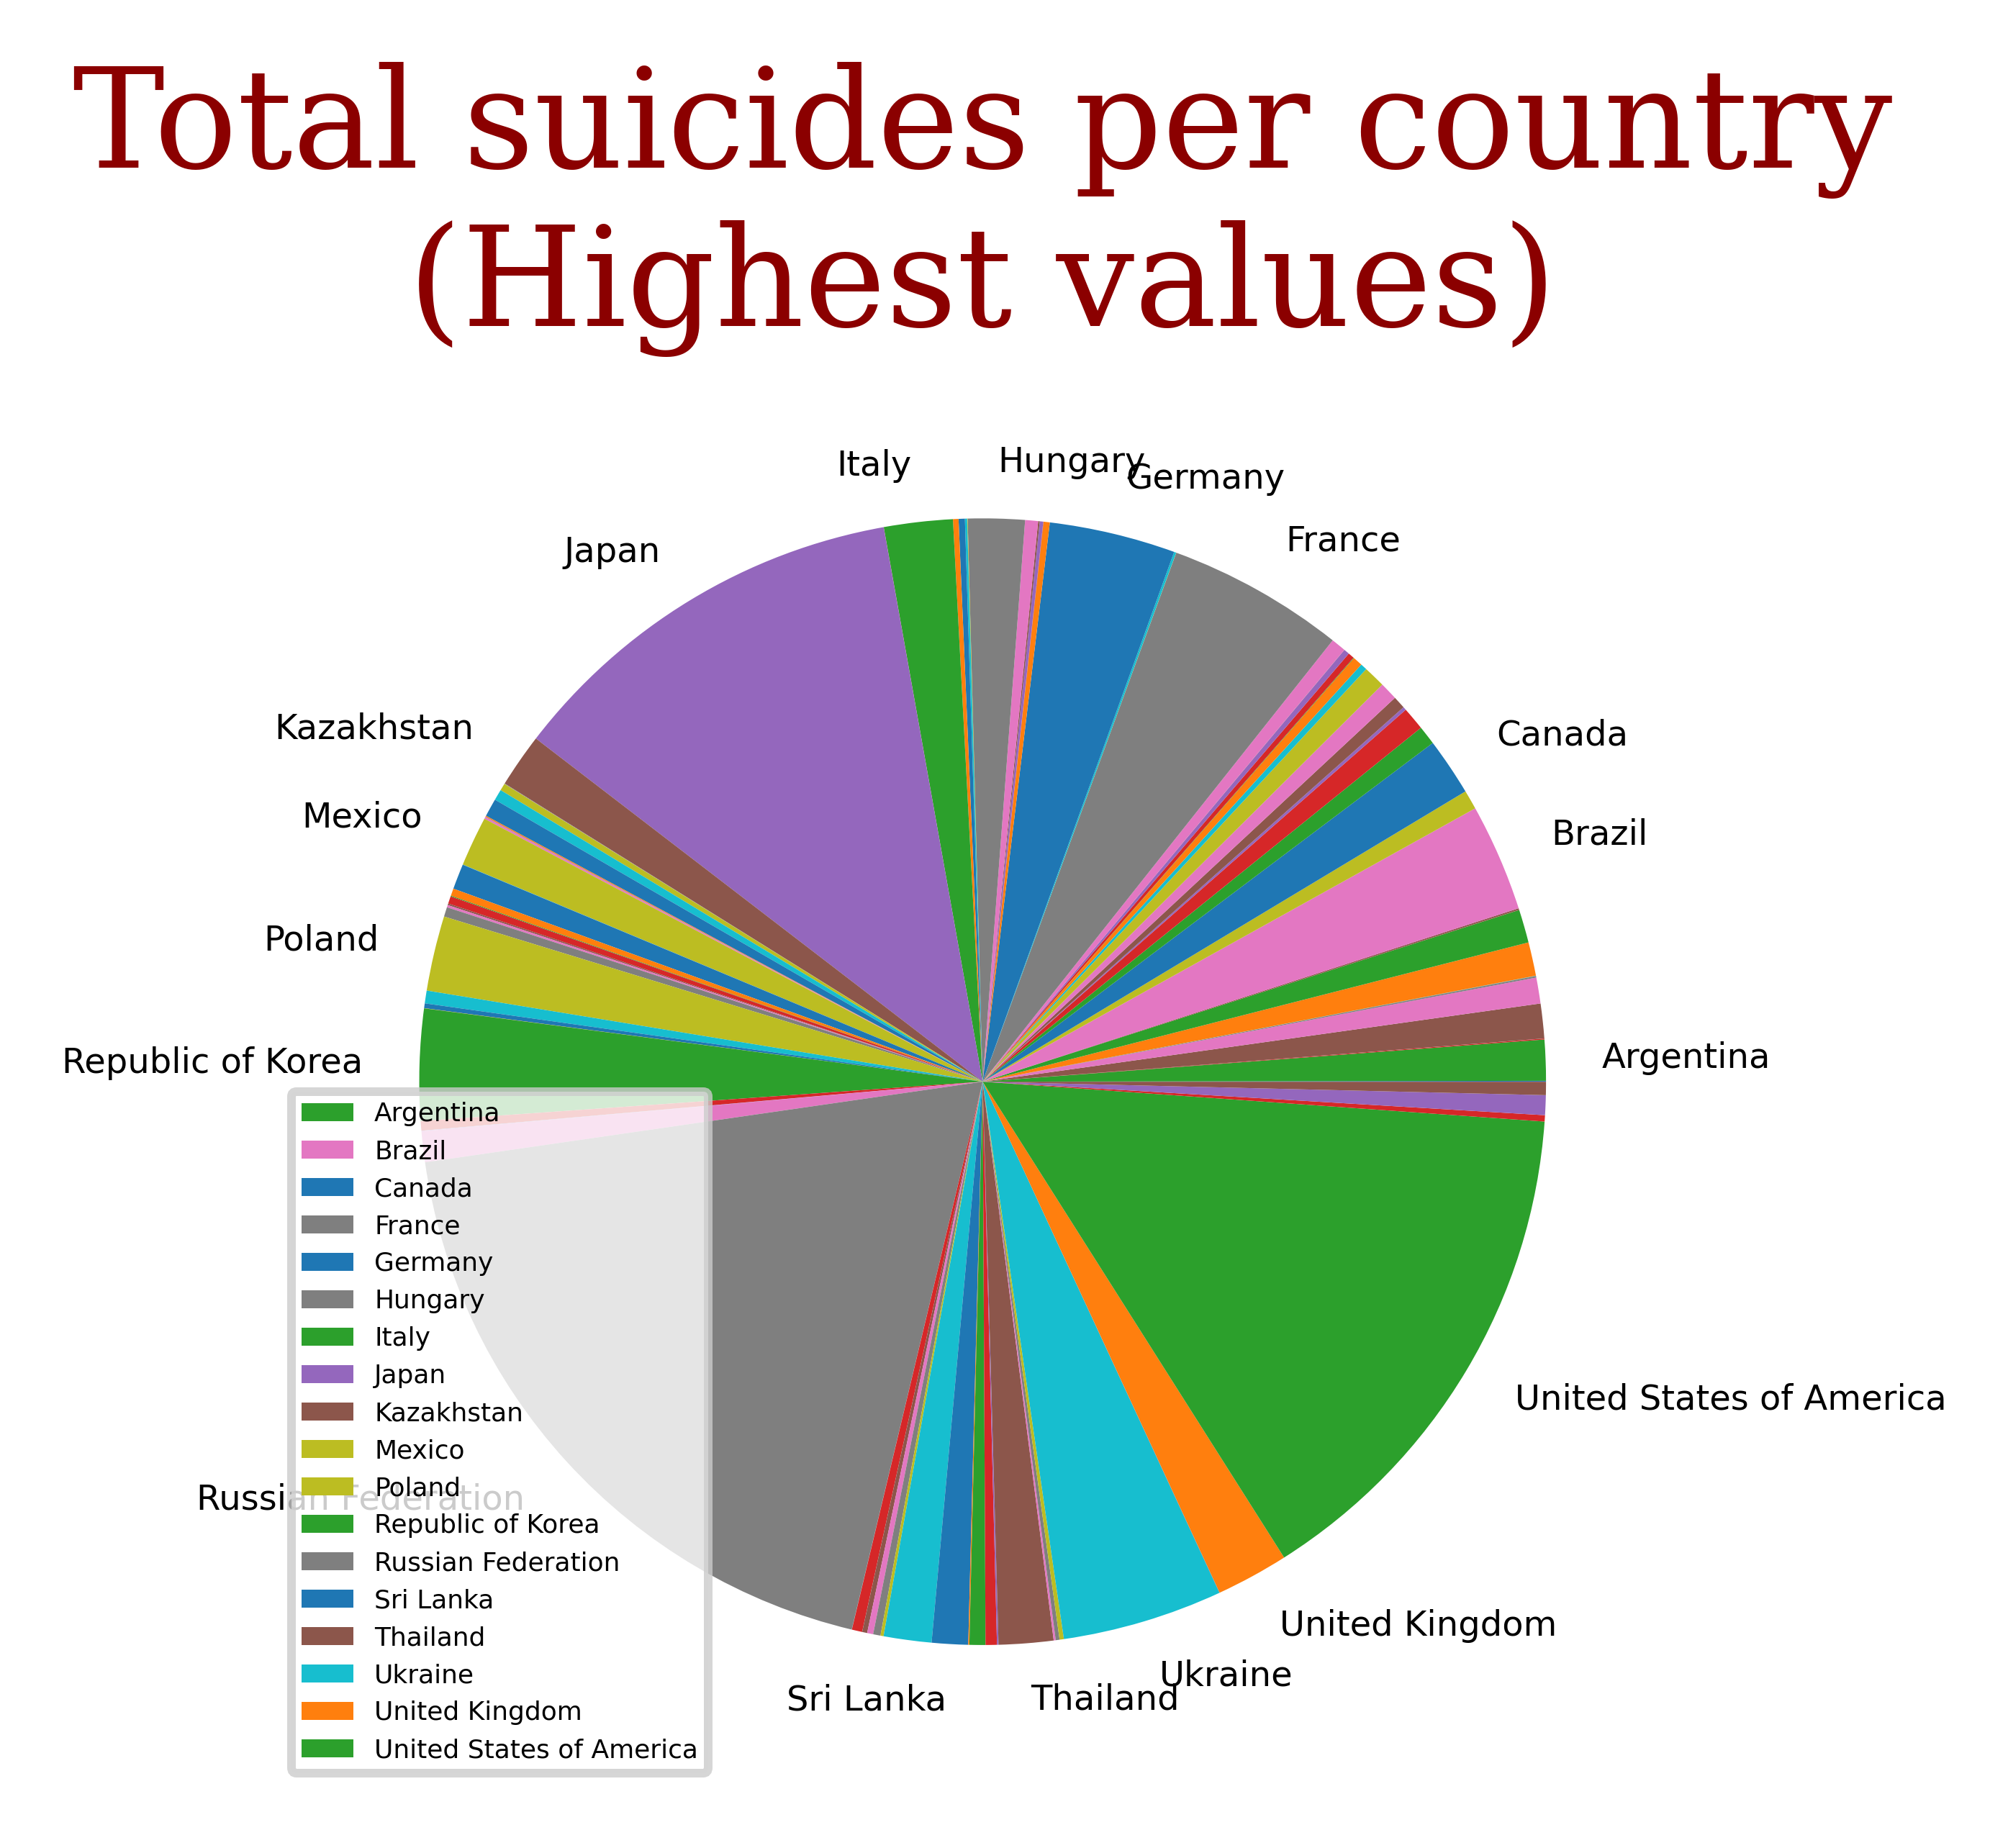

In [8]:
country_pie = transfer_for_plot(data, 'suicides_no', 'country')


dpi = 72*12
font = {
    'family': 'serif',
    'color': 'darkred',
    'size': 16
}
plt.figure(figsize = [20, 3], dpi=dpi)
b = list(country_pie[0])
summ = sum(country_pie[1])
for i in range(len(country_pie[1])):
    if (country_pie[1][i]/summ) <= 0.01 or b[i] == 'Spain':
        b[i] = ''
plt.pie(country_pie[1], labels=b, labeldistance=1.1, textprops={'fontsize': 4})
plt.title('Total suicides per country\n(Highest values)', fontdict=font)
plt.legend(prop={'size': 3}, loc = 'lower left')

### Here we are to compare countries with most cases.

Japan has much fewer cases than Russian Federation and United States of America, with peak in 1998 and stable decrease after. If we look at other two countries, there is an interesting pattern: for 30 years Russian Federation had much more cases than any other country, but because of the slow rising of cases in the US starting from year 2001 and fast decline in Russia starting year 2002, in year 2014 Japan and Russian Federation had almost equal number of cases, while United States of America had approximately 1.5 times more cases

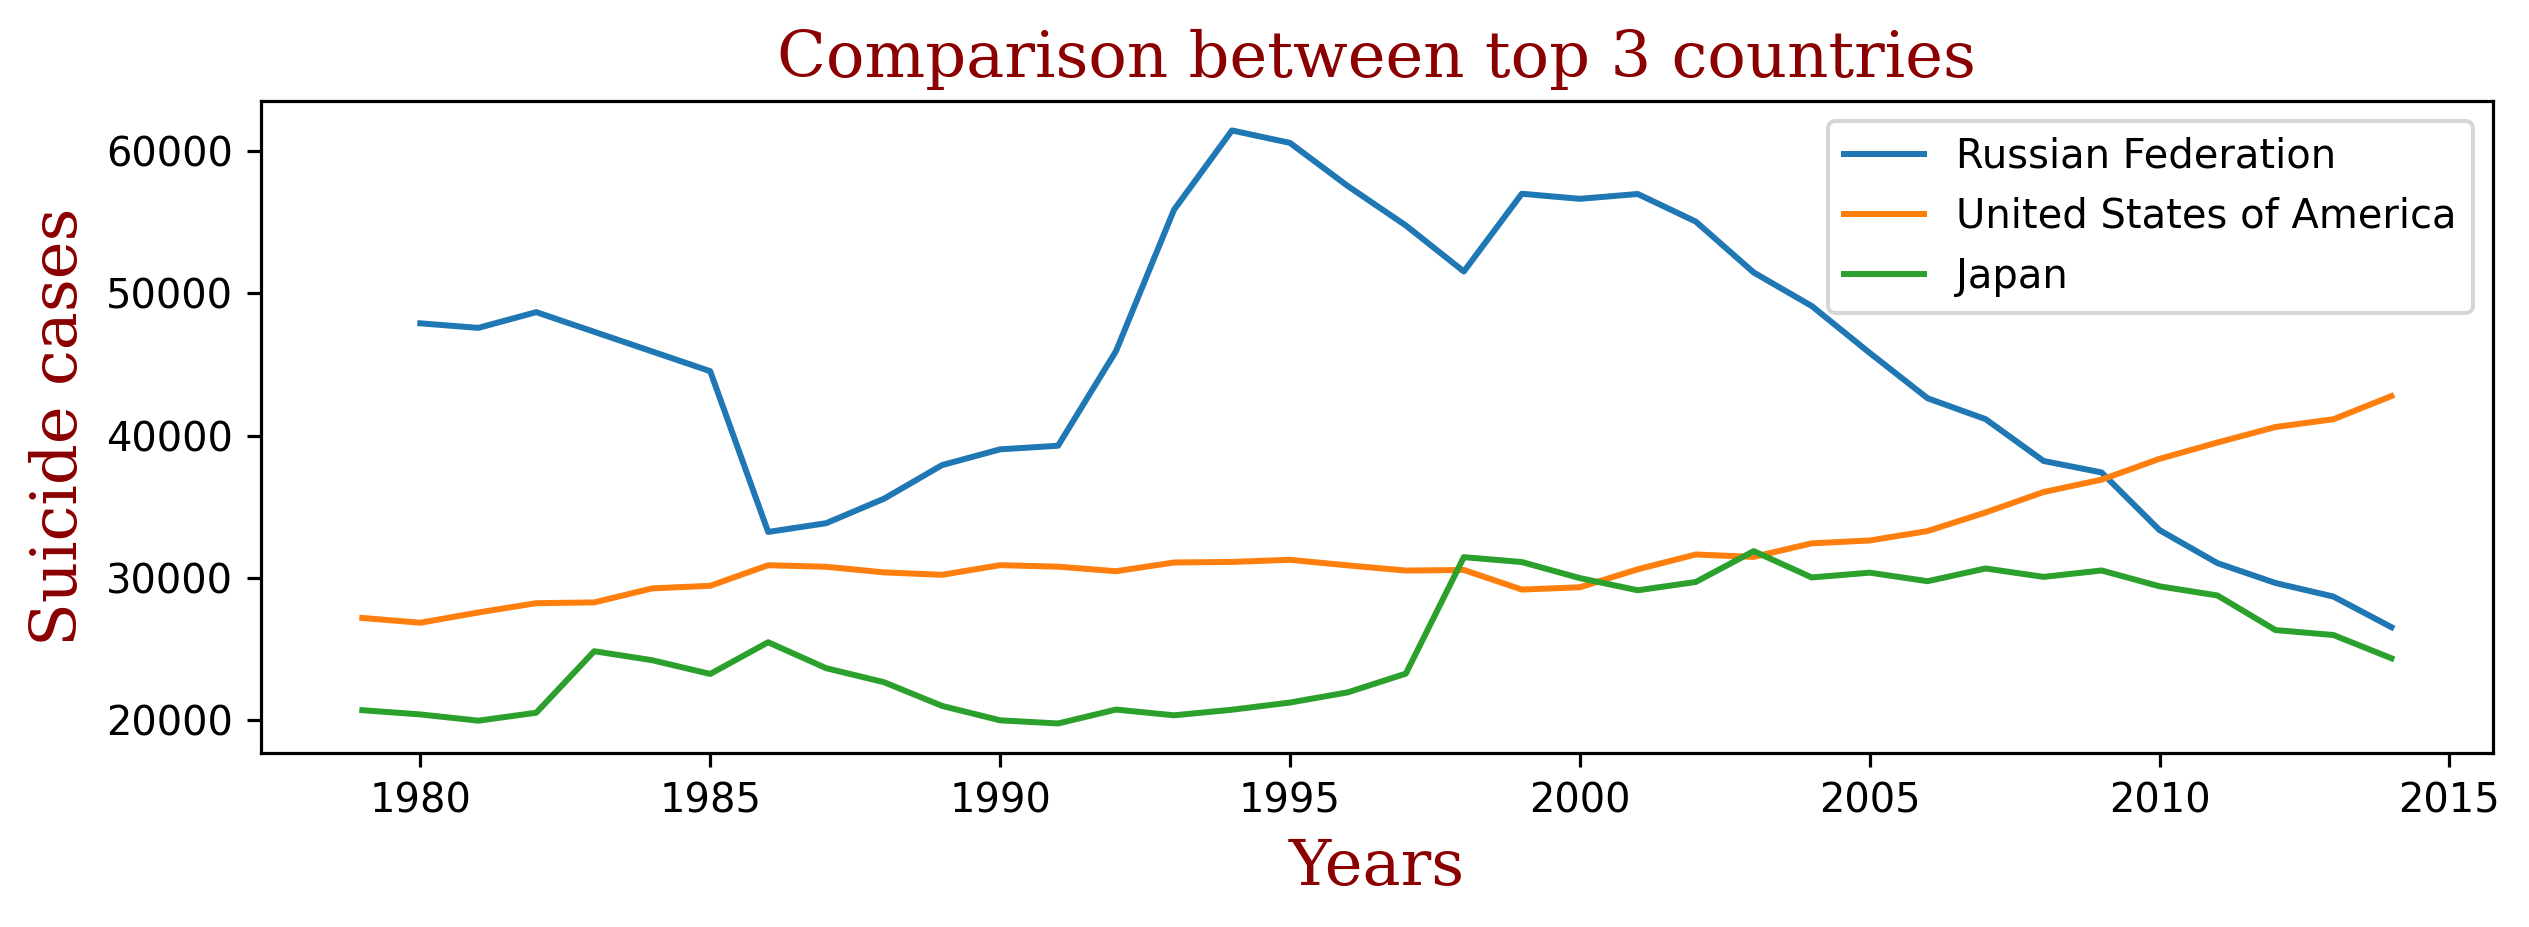

In [9]:
ru = transfer_for_plot(data[data.country == 'Russian Federation'], 'suicides_no', 'year')
usa = transfer_for_plot(data[data.country == 'United States of America'], 'suicides_no', 'year')
japan = transfer_for_plot(data[data.country == 'Japan'], 'suicides_no', 'year')

dpi = 72*4
font = {
    'family': 'serif',
    'color': 'darkred',
    'size': 16
}


plt.figure(figsize = [10, 3], dpi=dpi)
plt.plot(ru[0],ru[1], label='Russian Federation')
plt.plot(usa[0],usa[1], label='United States of America')
plt.plot(japan[0],japan[1], label='Japan')
plt.title('Comparison between top 3 countries', fontdict=font)
plt.xlabel('Years', fontdict=font)
plt.ylabel('Suicide cases', fontdict=font)
plt.legend()


## Conclusion

Plots above give some insight on the suicide cases change. Firstly, it is clear that for the whole period of time there have been more male cases than female. Secondly, one can see that cases worldwide have been decreasing for some years (to actual year 2016, from year 2003), which can be connected to improvement of living conditions all over the world and fewer wars. However, it is also important to understand that all information is gathered from official sources, so it is not possible to really tell whether data is accurate or not.

Another interesting fact is that population growth is quite stable and linear-shaped, while suicide cases are decreasing, which results in suicide cases per capita regression. The graph shows that and proves the idea. The spikes before may be connected to some events or to innacurate data harvested. Therefore situation is changing in a good way, probably as a result of society evolution(more suicide hotlines created, more psychologists working for companies and schools.)

To conclude, suicide was a much bigger problem in the past, but nowadays people are putting more and more effort in order to prevent all posible cases and save as many human lives as they can. Hopefully the trend will be kept in the future and the situation will continue getting better.